**Author** :     Avikshit Banerjee

**Contact**:     avikshitbanerjee@gmail.com

**Telephone**:   +44-7880205985


## Importing the data and the necessary libraries

In this section we import all the required libraries for performing ETL (Extract, Transform, Load) operations on the data, and the load all the required datasets from their respective paths.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import re

# Defining the data paths
applications_path = '/Users/Avit/Desktop/Lendable/assignment/application_samples.csv'
credit_path       = '/Users/Avit/Desktop/Lendable/assignment/credit_features.csv'

#Loading the datasets from the defined paths
df_app    = pd.read_csv(applications_path) #loading the applications dataset
df_credit = pd.read_csv(credit_path)       #loading the credit scores dataset

## Data Cleaning and Transformation

### Merging and transforming the data

Here we perform an inner merge to join both the data sets using the primary key which is the "UID" (customer IDs) in our case.

In [4]:
print(df_app.shape)
print(df_credit.shape)

(8847, 7)
(8847, 14)


In [5]:
#Joining the datasets
df = pd.merge(df_credit,df_app, how='inner', on='UID')

In [6]:
df.shape

(8847, 20)

#### Checking for NaN's and missing values 

Here we check for NaN's or missing values in the dataset , which if left undetected ot treated will introduce inconsitencies in the data. This may cause the classifier to break or produce incorrect results.

However in our case, as seen below, no missing values or NaN's were found in the dataset.

In [12]:
(df == -1).sum()

UID                                        0
ALL_AgeOfOldestAccount                   108
ALL_AgeOfYoungestAccount                 108
ALL_Count                                  0
ALL_CountActive                          116
ALL_CountClosedLast12Months              108
ALL_CountDefaultAccounts                 108
ALL_CountOpenedLast12Months              108
ALL_CountSettled                         108
ALL_MeanAccountAge                       108
ALL_SumCurrentOutstandingBal             108
ALL_SumCurrentOutstandingBalExcMtg       120
ALL_TimeSinceMostRecentDefault          8847
ALL_WorstPaymentStatusActiveAccounts     116
ApplicationDate                            0
Amount                                     0
Term                                       0
EmploymentType                             0
LoanPurpose                                0
Success                                    0
dtype: int64

In [361]:
#Checking for missing values or NaN values
df.isna().sum()


UID                                     0
ALL_AgeOfOldestAccount                  0
ALL_AgeOfYoungestAccount                0
ALL_Count                               0
ALL_CountActive                         0
ALL_CountClosedLast12Months             0
ALL_CountDefaultAccounts                0
ALL_CountOpenedLast12Months             0
ALL_CountSettled                        0
ALL_MeanAccountAge                      0
ALL_SumCurrentOutstandingBal            0
ALL_SumCurrentOutstandingBalExcMtg      0
ALL_TimeSinceMostRecentDefault          0
ALL_WorstPaymentStatusActiveAccounts    0
ApplicationDate                         0
Amount                                  0
Term                                    0
EmploymentType                          0
LoanPurpose                             0
Success                                 0
dtype: int64

From the dataset it could also be seen that the column 'ALL_TimeSinceMostRecentDefault' is redundant as it had the same value of -1, throughout hence adding no additional variance to the datset. The column 'UID' is also an indexing column and hence adds no variance to the dataset which might correlate with the target variable. Hence, it was decided to remove the two columns.

The names of the columns were also cumbersome and confusing, and hence the column names were renamed for more clarity and interpretability.

In [362]:
# Removing unnecesary columns from dataset
df_clean = df.drop(columns = ['UID', 'ALL_TimeSinceMostRecentDefault'])

#Renaming the columns for more clarity
df_clean = df_clean.rename(columns={'ALL_AgeOfOldestAccount':'old_acc_age',
                                      'ALL_AgeOfYoungestAccount':'young_acc_age',
                                      'ALL_Count':'no_of_acc',
                                      'ALL_CountActive':'active_acc',
                                      'ALL_CountClosedLast12Months': 'acc_close_lastyr',
                                      'ALL_CountDefaultAccounts':'default_acc',
                                      'ALL_CountOpenedLast12Months':'acc_open_lastyr',
                                      'ALL_CountSettled':'settled_acc',
                                      'ALL_MeanAccountAge':'mean_acc_age',
                                      'ALL_SumCurrentOutstandingBal':'outst_bal_sum',
                                      'ALL_SumCurrentOutstandingBalExcMtg':'outst_bal_excl_mortg',
                                      'ALL_WorstPaymentStatusActiveAccounts':'worst_payment_st_active'})


In [363]:
#Calculating the percentage of records with no accounts
zero_perc = (df_clean['no_of_acc'].eq(0).sum()/len(df_clean['no_of_acc']))*100
print(f'% of records with no of accounts as 0: {zero_perc}')

% of records with no of accounts as 0: 1.2207527975584944


In [364]:
#Displaying records coresponding to records having no accounts
df_clean[df_clean['no_of_acc']==0].head(10)

,old_acc_age,young_acc_age,no_of_acc,active_acc,acc_close_lastyr,default_acc,acc_open_lastyr,settled_acc,mean_acc_age,outst_bal_sum,outst_bal_excl_mortg,worst_payment_st_active,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
262,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,09/01/2020,2000,24,Employed - full time,Pay of credit cards,0
449,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,15/01/2020,10000,24,Employed - full time,Home improvements,0
472,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,16/01/2020,1500,12,Employed - part time,Vets bills,0
473,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,16/01/2020,15000,60,Employed - full time,home improvement,0
486,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,16/01/2020,2500,24,Employed - full time,for study,0
535,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,18/01/2020,20000,36,Employed - full time,Car and Course,0
576,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,20/01/2020,10000,24,Employed - full time,Home improvement,0
707,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,25/01/2020,5000,36,Employed - full time,parent treatment,0
787,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,28/01/2020,1500,24,Employed - full time,Debt consolidation,0
851,-1,-1,0,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,30/01/2020,10000,24,Self employed,Personal loan,0


Approximately 1% of the records had no bank accounts, i.e. the no. of accounts were 0. For all these records, the rest of the features, apart from the loan outcome and the loan amount, were flagged as -1. This generally refers to invalid or missing data, which has been replaced with -1 during data population. This is further confirmed upon checking the column meant to show the the outstanding balances, which too were negative. Since balance can never be negative, this shows the existence of invalid/missing data. Since these data points accounted for about 1% of the entire dataset, it was decided to replace them with the mean value of that column. 

The 'no_of_acc' column where the values were equal to 0, were also replaced by the mean of that coumn. This was done because later in the feature engineering stages, any calculation required to be done using this column may trigger exceptions.

Obviously the other option was to completely remove these data points from the dataset, as they accounted for only 1% of the data anyway, but since they was other valuable information like the date of application, the loan amount, etc., removing them would lead to the loss of a certain degree of variance.

### Imputing the records containing invalid/missing records with the mean.

In [365]:
#Imputing records with invalid.
#All the records with 0 accounts were associated with negative flags, which means invalid data/missing data

#Mean imputing values containing -1 
impute_columns=['old_acc_age', 'young_acc_age', 'no_of_acc', 'active_acc',
                'acc_close_lastyr', 'default_acc', 'acc_open_lastyr', 'settled_acc',
                'mean_acc_age', 'outst_bal_sum', 'outst_bal_excl_mortg']


for i in impute_columns:
    df_clean[i] = df_clean[i].replace(-1,df_clean[i].mean().astype(int) )
    
#mean imputing the column with no of accounts as 0
df_clean['no_of_acc'] = df_clean['no_of_acc'].replace(0,df_clean['no_of_acc'].mean().astype(int))

# Feature Engineering 

This is arguably the most important section, as it allows us to ad variance in the form of additional derived features which would allow the algorithm to learn complex dependencies within the dataset, linear or non linear.

The feature engineering steps which are followed are as below:

## 1. Converting all 'object/string' data types into 'category' data type.

Classification algorithms require numerical input. Converting object type data to category data prepares the data for encoding methods like one-hot encoding or label encoding (which will be employed later on), which are used to transform categorical features into a numerical format that can be fed into models.

In [366]:
#Convert object dtype to category dtype for feature processing
for i in df_clean.columns:
    if df_clean[i].dtype == 'object':
        df_clean[i] = df_clean[i].astype('category')

#Displaying all the data types
df_clean.dtypes

old_acc_age                   int64
young_acc_age                 int64
no_of_acc                     int64
active_acc                    int64
acc_close_lastyr              int64
default_acc                   int64
acc_open_lastyr               int64
settled_acc                   int64
mean_acc_age                float64
outst_bal_sum                 int64
outst_bal_excl_mortg          int64
worst_payment_st_active       int64
ApplicationDate            category
Amount                        int64
Term                          int64
EmploymentType             category
LoanPurpose                category
Success                       int64
dtype: object

## 2. Splitting up the date column.

The 'ApplicationDate' column, is split up and its elements are extracted, such as the day of the week ('day'), month ('month'), and year ('year') of the loan application. These temporal features help capturing seasonality or trends that could provide useful variance in relation to the application outcomes. 

In our scenario, we split the 'ApplicationDate' column into the following:
- Day: The date (integer)
- Day of the week: The day represented as a number between 0 - 6.
- Month: Name of the month.
- Weekday: Name of the day.

Note: We do not extract the year as the dataset provided contains records, all beonging to the year of 2020. Hence it is redundant in this regard.

In [367]:
#Using the pandas datetime feature we convert the date column into a splittable format
df_clean['ApplicationDate'] = pd.to_datetime(df_clean['ApplicationDate'], format="%d/%m/%Y")

#Importing calendar to capture seasonality and trends
#Not doing years as it's the same year 2020 throughout
import calendar

#Initialising the calendar lists
day=[]
day_of_week=[]
month=[]
weekday=[]

#Extracting the elements from the converted date column
for x in df_clean['ApplicationDate']:
    day.append(x.day)
    day_of_week.append(x.day_of_week)
    month.append(x.month)
    weekday.append(calendar.day_name[day_of_week[-1]])

#Assigning the lists to new temporal columns in the dataset
df_clean['day']=day
df_clean['day_of_week']=day_of_week
df_clean['month']=month
df_clean['weekday']=weekday

We then rearrange the order of the columns so as to ensure the target variable is the last column for convinence and clarity. We also get rid of the 'ApplicationDate' column as it is now redundant, given that we have extracted the temporal features.

In [368]:
#rearranging the colum order so as to ensure the target variable is the last column for convinence and clarity
df_clean = df_clean[['old_acc_age', 'young_acc_age', 'no_of_acc', 'active_acc',
       'acc_close_lastyr', 'default_acc', 'acc_open_lastyr', 'settled_acc',
       'mean_acc_age', 'outst_bal_sum', 'outst_bal_excl_mortg',
       'worst_payment_st_active', 'ApplicationDate', 'Amount', 'Term',
       'EmploymentType', 'LoanPurpose', 'day', 'month',
       'day_of_week', 'weekday','Success']]

#Dropping the redundant application date column as it is redundant
df_clean.drop(['ApplicationDate'], axis = 1, inplace = True)


In [369]:
#Displaying top 5 rows
df_clean.head(5)

,old_acc_age,young_acc_age,no_of_acc,active_acc,acc_close_lastyr,default_acc,acc_open_lastyr,settled_acc,mean_acc_age,outst_bal_sum,...,worst_payment_st_active,Amount,Term,EmploymentType,LoanPurpose,day,month,day_of_week,weekday,Success
0,227,12,14,11,0,3,0,3,71.36,9292,...,7,7000,36,Employed - full time,purchase,1,1,2,Wednesday,0
1,49,10,7,6,1,3,1,1,29.33,4592,...,7,1000,60,Employed - full time,cosmetic surgery,1,1,2,Wednesday,0
2,134,0,12,11,0,3,5,1,32.33,2737,...,7,2000,24,Employed - part time,Consolidation,1,1,2,Wednesday,0
3,227,2,39,12,0,2,2,27,41.56,9229,...,7,4000,48,Employed - full time,Child expenses,1,1,2,Wednesday,0
4,132,2,99,11,8,0,9,88,43.34,15443,...,0,7000,60,Employed - full time,New machine,1,1,2,Wednesday,0


### Checking for outliers

To check for outliers, the box-plot distribution of all the numerical columns are checked. As seen below, we can see that there are many ouliers present among the numerical columns and most of the numerical data have a right skewed distribution.

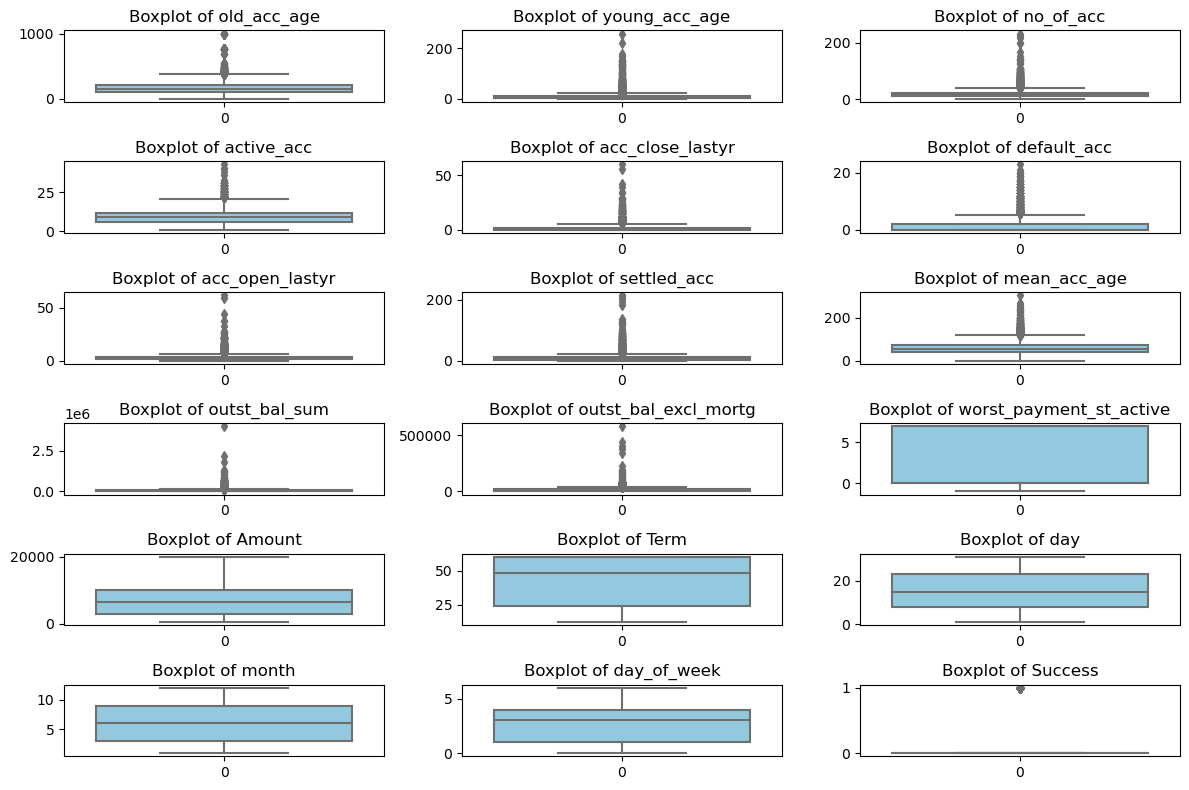

In [370]:
#Getting all the continuous columns
number_columns = []
for i in df_clean.columns:
    if df_clean[i].dtype == 'int64' or df_clean[i].dtype == 'float64' :
        number_columns.append(i)

# Calculate the number of rows required for subplots
num_cols = len(number_columns)
num_rows = math.ceil(num_cols / 3)

#Plot
plt.figure(figsize=(12, 8))

# Plot boxplots for each numeric column
for i, col in enumerate(number_columns):
    plt.subplot(num_rows, 3, i + 1)  # Use 'num_rows' instead of '2' in the first argument of 'plt.subplot()'
    sns.boxplot(df_clean[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

# Show the plot
plt.show()

### Splitting the data for train and test.
Performing train test split before performing further data engineering to avoid unexpected data leakage. This data leakage, if happense, may result in incorrect results which might be over-optimistic and misleading.

In [371]:
from sklearn.model_selection import train_test_split

x = df_clean.iloc[:, 0:-1]
y = df_clean.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [373]:
print(f'Shape of the train set:{x_train.shape}')#printing dimensions of train set
print(f'Shape of the test set:{x_test.shape}')#printing dimensions of test set

Shape of the train set:(7077, 20)
Shape of the test set:(1770, 20)


## 3. Creating new features by combining existing ones

In order for the machine learning algorithms to learn from more complexities in the data set, new engineered columns were added based on existing columns which will help the algorithms learn more non-linear realtionships in the dataset, if present.

The following new columns were added:

- Account age difference = Oldest - Youngest account age : provides insights into the applicant's credit history and stability.
- Account Activity Ratio = No. of active acc/Total no. of acc: provides insights into the applicant's financial engagement and responsibility.
- Account Default rate = No. of defaulted accounts/ Total no. of accounts: A crucial risk indicator
- Account Closure and Opening Features = acc opened last year - acc closed last year: applicant's recent financial behavior
- Debt ratio = Application Amount / Term of repayment: An indicator of monthly debt burden

#### Here we define a series of functions which will perform the above mentioned engineering steps:

In [374]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
le     = preprocessing.LabelEncoder()


#Defining a function for outlier handling
def outlier_handling(data, columns):   
    for col in columns:
        data[col] = np.log1p(data[col]) #Applying log1p to deal with 0s in the dataset
        
        
#Defining a function for the creation of features:
def create_features(data):
    data['acc_age']          = data['old_acc_age'] - data['young_acc_age'] #Account age difference
    data['acc_activity']     = data['active_acc']  / data['no_of_acc'] #Account Activity Ratio
    data['acc_default_rate'] = data['default_acc'] / data['no_of_acc'] #Account Default rate
    data['fin_activity']     = data['acc_open_lastyr'] - data['acc_close_lastyr'] #Financial behaviour
    data['debt_ratio']       = data['Amount'] / data['Term'] #Monthly debt
    

      
#Defining a function for peforming adaptive binning of continuous variables
def binning_numeric(data, columns): 
    for col in columns:
        #Convert each variable into 5 equal categories/each
        data[col + '_bin']   = pd.qcut(data[col],     q=[0, .25, .50, .75, 1], duplicates='drop')
        

#Defining a function for label encoding columns       
def label_encoding(data, columns):
    for col in columns:
        data[col] = le.fit_transform(data[col])
        

#Defining a function for one hot encoding categorical columns with cats <5
def OH_encoding(data, columns):
    
    for col in columns:
        nominal = onehot.fit_transform(data[[col]])
        df_nominal = pd.DataFrame(index=data.index, data=nominal, columns=onehot.get_feature_names_out([col]))
        data = pd.concat([data, df_nominal], axis=1)
        data.drop(columns=[col], inplace=True)
        
    return data
    

### Outlier Correction:

But before we can perform any further steps, we use a logarithmic transform on the skewed numerical columns to minimise the effect of the outliers on the training process. The logarithmic transform will only affect the larger values (the outliers), while the smaller values will mostly remain untouched. This was performed to reduce the skewness of the distributions.

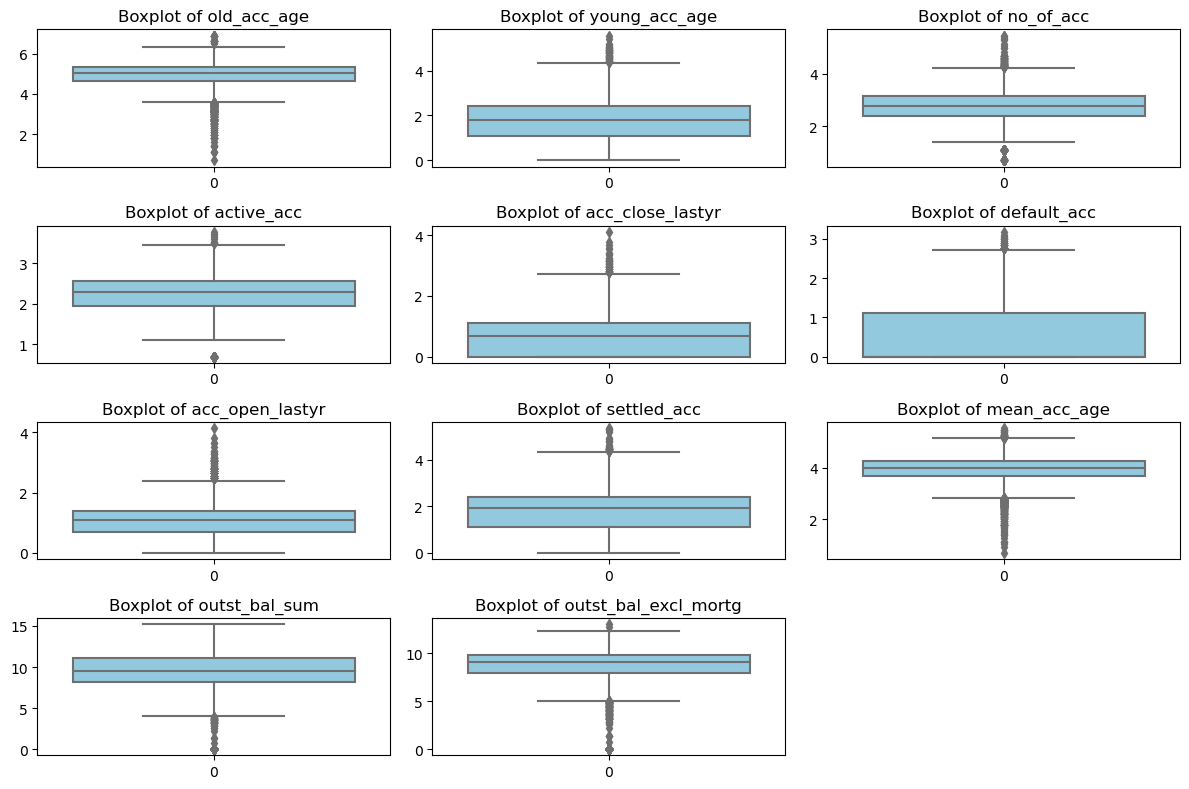

In [375]:
#Defining the columns containing outlier values
outlier_columns = ['old_acc_age',
 'young_acc_age',
 'no_of_acc',
 'active_acc',
 'acc_close_lastyr',
 'default_acc',
 'acc_open_lastyr',
 'settled_acc',
 'mean_acc_age',
 'outst_bal_sum',
 'outst_bal_excl_mortg']

#Applying the log transform through the function call
outlier_handling(x_train, outlier_columns)

out_cols = len(outlier_columns)
out_rows = math.ceil(out_cols / 3)

#Plot
plt.figure(figsize=(12, 8))

for i, col in enumerate(outlier_columns):
        plt.subplot(out_rows, 3, i + 1)  
        sns.boxplot(x_train[col], color='skyblue')
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
plt.show()

#Applying to test set
outlier_handling(x_test, outlier_columns)



As seen above, the skewness of the numerical columns id greatly reduced with the logarithmic transformation applied. This will benefit the classifier modelling algorithms to have a less biased train set and give more robust predictions.

## 4. Creating the new features based on existing features.

We pass both the train and test sets to the function for creating new features, which may add layers of complexity to the dataset, enabling the classifie algorithms to learn from non-linear realtionships which may exist in the dataset.

In [376]:
#Applying to train set
create_features(x_train)
#Applying to test set
create_features(x_test)

In [377]:
#Displaying the train set
x_train.head(5)

,old_acc_age,young_acc_age,no_of_acc,active_acc,acc_close_lastyr,default_acc,acc_open_lastyr,settled_acc,mean_acc_age,outst_bal_sum,...,LoanPurpose,day,month,day_of_week,weekday,acc_age,acc_activity,acc_default_rate,fin_activity,debt_ratio
5178,5.170484,1.609438,3.970292,2.833213,1.609438,0.000000,2.484907,3.610918,3.770920,10.771701,...,Debt consolidation,20,7,0,Monday,3.561046,0.713603,0.00000,0.875469,166.666667
1924,4.828314,0.693147,3.496508,2.708050,2.833213,0.693147,3.178054,2.944439,3.005187,9.992002,...,car,5,3,3,Thursday,4.135167,0.774501,0.19824,0.344840,41.666667
5938,4.465908,3.784190,1.791759,1.791759,0.000000,0.000000,0.000000,0.000000,4.143135,9.644069,...,Consolidation,24,8,0,Monday,0.681718,1.000000,0.00000,0.000000,250.000000
4150,4.812184,1.791759,2.639057,2.302585,1.386294,0.000000,1.098612,1.609438,3.390810,9.232200,...,Consoladate some debts,5,6,4,Friday,3.020425,0.872503,0.00000,-0.287682,250.000000
4875,4.852030,1.386294,2.708050,2.484907,0.693147,0.000000,1.386294,1.386294,3.424588,9.937792,...,Repairs,7,7,1,Tuesday,3.465736,0.917600,0.00000,0.693147,150.000000


## 5. Performing adaptive binning of numerical features

Performing discretisation of the continuous variables. This is being done to perform effectively two functions:
1. By discretizing continuous variables, the effect of outliers are mitigated as the columns are encoded into categories/bins. Although the logarithmic transform mitigates most of, discretisation used in conjunction, makes it more robust.
2. This will also allow the classification algorithmns to capture any non-linear realtionships in the dataset, which may help the model to generalise better.

In [378]:
#Getting all the continuous columns for adaptive binning
num_columns = []
for i in x_train.columns:
    if x_train[i].dtype == 'int64' or x_train[i].dtype == 'float64' :
        num_columns.append(i)

In [379]:
#Getting all the continuous columns for adaptive binning
num_columns = []
for i in x_train.columns:
    if x_train[i].dtype == 'int64' or x_train[i].dtype == 'float64' :
        num_columns.append(i)
        
#binning continuous columns using adaptive binning, due to the nature of the distributions.
binning_columns = ['old_acc_age',
 'young_acc_age',
 'no_of_acc',
 'active_acc',
 'acc_close_lastyr',
 'default_acc',
 'acc_open_lastyr',
 'settled_acc',
 'mean_acc_age',
 'outst_bal_sum',
 'outst_bal_excl_mortg',
 'Amount',
 'acc_age',
 'acc_activity',
 'acc_default_rate',
 'fin_activity',
 'debt_ratio']

#applying biining on the train set
binning_numeric(x_train, binning_columns)

#applying biining on the test set
binning_numeric(x_test, binning_columns)


In [380]:
#Displaying the train set
x_train.head(5)

,old_acc_age,young_acc_age,no_of_acc,active_acc,acc_close_lastyr,default_acc,acc_open_lastyr,settled_acc,mean_acc_age,outst_bal_sum,...,settled_acc_bin,mean_acc_age_bin,outst_bal_sum_bin,outst_bal_excl_mortg_bin,Amount_bin,acc_age_bin,acc_activity_bin,acc_default_rate_bin,fin_activity_bin,debt_ratio_bin
5178,5.170484,1.609438,3.970292,2.833213,1.609438,0.000000,2.484907,3.610918,3.770920,10.771701,...,"(2.398, 5.375]","(3.7, 4.008]","(9.502, 11.051]","(9.798, 12.992]","(6500.0, 10000.0]","(3.164, 3.839]","(0.291, 0.769]","(-0.001, 0.356]","(0.693, 2.485]","(145.833, 250.0]"
1924,4.828314,0.693147,3.496508,2.708050,2.833213,0.693147,3.178054,2.944439,3.005187,9.992002,...,"(2.398, 5.375]","(0.692, 3.7]","(9.502, 11.051]","(9.798, 12.992]","(499.999, 3000.0]","(3.839, 6.644]","(0.769, 0.841]","(-0.001, 0.356]","(0.288, 0.693]","(16.666, 83.333]"
5938,4.465908,3.784190,1.791759,1.791759,0.000000,0.000000,0.000000,0.000000,4.143135,9.644069,...,"(-0.001, 1.099]","(4.008, 4.285]","(9.502, 11.051]","(9.08, 9.798]","(10000.0, 20000.0]","(-0.001, 2.457]","(0.904, 3.322]","(-0.001, 0.356]","(-2.304, 0.0]","(145.833, 250.0]"
4150,4.812184,1.791759,2.639057,2.302585,1.386294,0.000000,1.098612,1.609438,3.390810,9.232200,...,"(1.099, 1.946]","(0.692, 3.7]","(8.208, 9.502]","(9.08, 9.798]","(3000.0, 6500.0]","(2.457, 3.164]","(0.841, 0.904]","(-0.001, 0.356]","(-2.304, 0.0]","(145.833, 250.0]"
4875,4.852030,1.386294,2.708050,2.484907,0.693147,0.000000,1.386294,1.386294,3.424588,9.937792,...,"(1.099, 1.946]","(0.692, 3.7]","(9.502, 11.051]","(9.798, 12.992]","(6500.0, 10000.0]","(3.164, 3.839]","(0.904, 3.322]","(-0.001, 0.356]","(0.288, 0.693]","(145.833, 250.0]"


## 6. Performing Label Encoding 

After having discretising the numeric columns into bins, splitting the dates into temporal elements and converting object type columns into categories, we perform label encoding to assign discrete integer labels to every category. For this dataset we perform label encoding on the following columns:

1. Temporal columns: 'weekday','day_of_week','month','day'
2. Discretised bins.

For the temporal columns, we don't want to impose any sort of order of importance post label encoding, hence we shall convert them into category data types (shown later on in this notebook).

The column 'LoanPurpose' is also label encoded so as to assign discrete numeric categories to every type of reason, so that the classifier algorithm can map the correlation between the reasons and the outcomes (if any).

Howver, for the binning column, it is important for the classifier algorithms to impose a order hierarchy based on the integer labels (as in this context, a higher label value should mean a higher numeric value), we will keep the data type as integer.

It is also important to note that, for the columns with no order, it is possible to perform One Hot encoding as well, but since ensemle classifiers do not perform well on highly sparse dataset, I chose to perform label encoding for the columns with 5 or more than 5 levels.

In [381]:
#those features with NO order in their categories for >=5 cats                 
labelCols=['Term','LoanPurpose', 'day', 'month', 'day_of_week', 'weekday', 
       'old_acc_age_bin', 'young_acc_age_bin', 'no_of_acc_bin',
       'active_acc_bin', 'acc_close_lastyr_bin', 'default_acc_bin',
       'acc_open_lastyr_bin', 'settled_acc_bin', 'mean_acc_age_bin',
       'outst_bal_sum_bin', 'outst_bal_excl_mortg_bin', 'Amount_bin',
       'acc_age_bin', 'acc_activity_bin', 'acc_default_rate_bin',
       'fin_activity_bin', 'debt_ratio_bin']

label_encoding(x_train, labelCols)

label_encoding(x_test, labelCols)


## 7. Performing One Hot Encoding

We perform One Hot Encoding for the categorical variables with less than 5 categories, as these will not lead to very sparse matrices, which can otherwise affect the performance of classifiers like Decision Trees or Random Forests.

In our context we perform One Hot Encoding for the 'EmploymentType'column, which states the type of employment category of each applicant and contains four categories. Also since there is no apparent order of the employment categories, One Hot Encoding is performed.

In [382]:
#One hot encoding columns with categorical columns with cats <5
oheCols = ['EmploymentType']

#Applying OHE to the train set
x_train = OH_encoding(x_train, oheCols)

#Applying OHE to the test set
x_test  = OH_encoding(x_test, oheCols)

/Users/Avit/miniforge3/envs/dev_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/Avit/miniforge3/envs/dev_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [383]:
#Displaying the train set
x_train.head(5)

,old_acc_age,young_acc_age,no_of_acc,active_acc,acc_close_lastyr,default_acc,acc_open_lastyr,settled_acc,mean_acc_age,outst_bal_sum,...,outst_bal_excl_mortg_bin,Amount_bin,acc_age_bin,acc_activity_bin,acc_default_rate_bin,fin_activity_bin,debt_ratio_bin,EmploymentType_Employed - part time,EmploymentType_Retired,EmploymentType_Self employed
5178,5.170484,1.609438,3.970292,2.833213,1.609438,0.000000,2.484907,3.610918,3.770920,10.771701,...,3,2,2,0,0,3,2,0.0,0.0,0.0
1924,4.828314,0.693147,3.496508,2.708050,2.833213,0.693147,3.178054,2.944439,3.005187,9.992002,...,3,0,3,1,0,2,0,0.0,0.0,0.0
5938,4.465908,3.784190,1.791759,1.791759,0.000000,0.000000,0.000000,0.000000,4.143135,9.644069,...,2,3,0,3,0,0,2,0.0,0.0,0.0
4150,4.812184,1.791759,2.639057,2.302585,1.386294,0.000000,1.098612,1.609438,3.390810,9.232200,...,2,1,1,2,0,0,2,0.0,0.0,0.0
4875,4.852030,1.386294,2.708050,2.484907,0.693147,0.000000,1.386294,1.386294,3.424588,9.937792,...,3,2,2,3,0,2,2,0.0,0.0,0.0


## 8. Correcting Class Imbalance
In this section we check for class imbalances in the target variable, which is the column labelled 'Success'.

In [384]:
#Checking the spread of the binary classes of the target variable
(y_train.value_counts()/len(y_train))*100

0    89.614243
1    10.385757
Name: Success, dtype: float64

### Performing over sampling 
As seen from the class imbalance, we can see that the number of succesful applications (Category - 1) are approximately 10% of the total target variable distribution, which makes it severly underrepresented. This might lead to skewed and biased results during the training of the calssifier algorithm.

To counter this problem, we perform over sampling on the train dataset only, which will generate similar synthetic data points using clustering such that the minority class is more represented and the trained classifier is more robust and unbiased.

For our classification problem, we shall be using SMOTE, which stands for Synthetic Minority Over-sampling Technique, to over sample the minority class.

We choose a sampling strategy of 40% which means that the minority class samples will be upsampled to 40% of the majority class samples. This results in a less imbalanced 70-30 class balance which reduces bias but also does not oversample to the extent of introducing synthetic noise into the dataset.

In [385]:
# Over-sampling
from imblearn.over_sampling import SMOTE

#Balancing the minority class 
oversample = SMOTE(sampling_strategy=0.4)
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [386]:
#Target variable distribution after oversampling.
(y_train.value_counts()/len(y_train))*100

0    71.435008
1    28.564992
Name: Success, dtype: float64

## 9. Categorising label encoded numeric columns with no order

So as to avoid giving the impression of apparent order and importance of labels encoded for columns with no apparent order, it is required that their data types be converted tp 'category' so that they are treated as dummy variables without any apparent order.

For our dataset, we categorise the labels of the columns 'day','month','day_of_week','weekday', 'LoanPurpose', which do not posess any apparent order of priority.

In [387]:
#label encoded columns with no order
no_order = ['day','month','day_of_week','weekday', 'LoanPurpose']

#Converting the data type on the train set
x_train[no_order] = x_train[no_order].astype('category')

#Converting the data type on the test set
x_test[no_order] = x_test[no_order].astype('category')

## 10. Feature Scaling and Feature Selection



### Feature Scaling

Using Robust Scaler to scale all the values into a similar range, which makes the nentire dataset more digestible for the classifier algorithms. We use robust scaler as it scales columns based on the inter-quartile ranges and hence it is resilient to the effect of outliers


In [388]:
#Impporting the Robust Scaler library
from sklearn.preprocessing import RobustScaler

#Scaling the train set
x_train_scaled = pd.DataFrame(RobustScaler().fit_transform(x_train), columns=x_train.columns)

#Scale test set
x_test_scaled = pd.DataFrame(RobustScaler().fit_transform(x_test), columns=x_test.columns)


### Calculating Feature importances

For calculating the feature importances, the ExtraTreesClassifier has been used which uses the Gini Index to determine the entropy contribution of the features and calculate it's importance with respect to the target variable.

This step is being performed so that during the feature selection process, it will be useful to determine which features to keep and which features to drop, for improving performance.

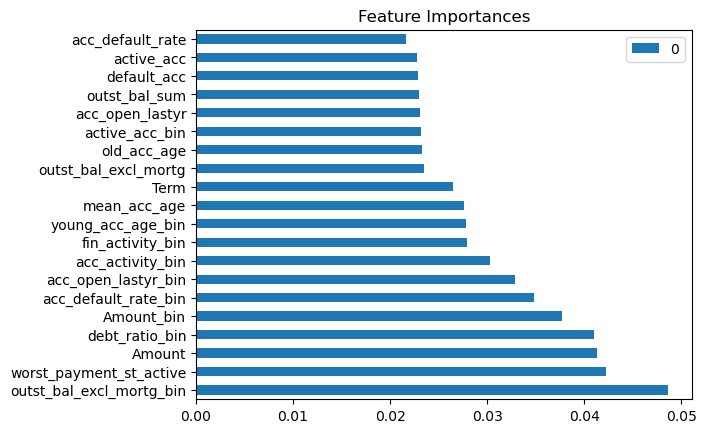

In [389]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

#Initialising the Ensemble lasifier
fi = ExtraTreesClassifier()
fi_train = fi.fit(x_train_scaled, y_train)

#Applying on the train set and finding the top 20 features.
df_fi = pd.DataFrame(fi_train.feature_importances_,index=x_train_scaled.columns)
df_fi.nlargest(20,df_fi.columns).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

### Visualising the Correlation Matrix Heatmap

A correlation matrix heatmap is visualised to check for correlations between the features, such that redundant features may be removed and features that are correlated with the target variable may be prioritised.

mean_acc_age_bin    0.078652
outst_bal_sum       0.099150
old_acc_age         0.149821
mean_acc_age        0.191376
Success             1.000000
Name: Success, dtype: float64
default_acc_bin           -0.255264
default_acc               -0.256031
acc_default_rate          -0.257239
acc_default_rate_bin      -0.286178
worst_payment_st_active   -0.294901
Name: Success, dtype: float64


<Axes: title={'center': 'Correlation Heatmap'}>

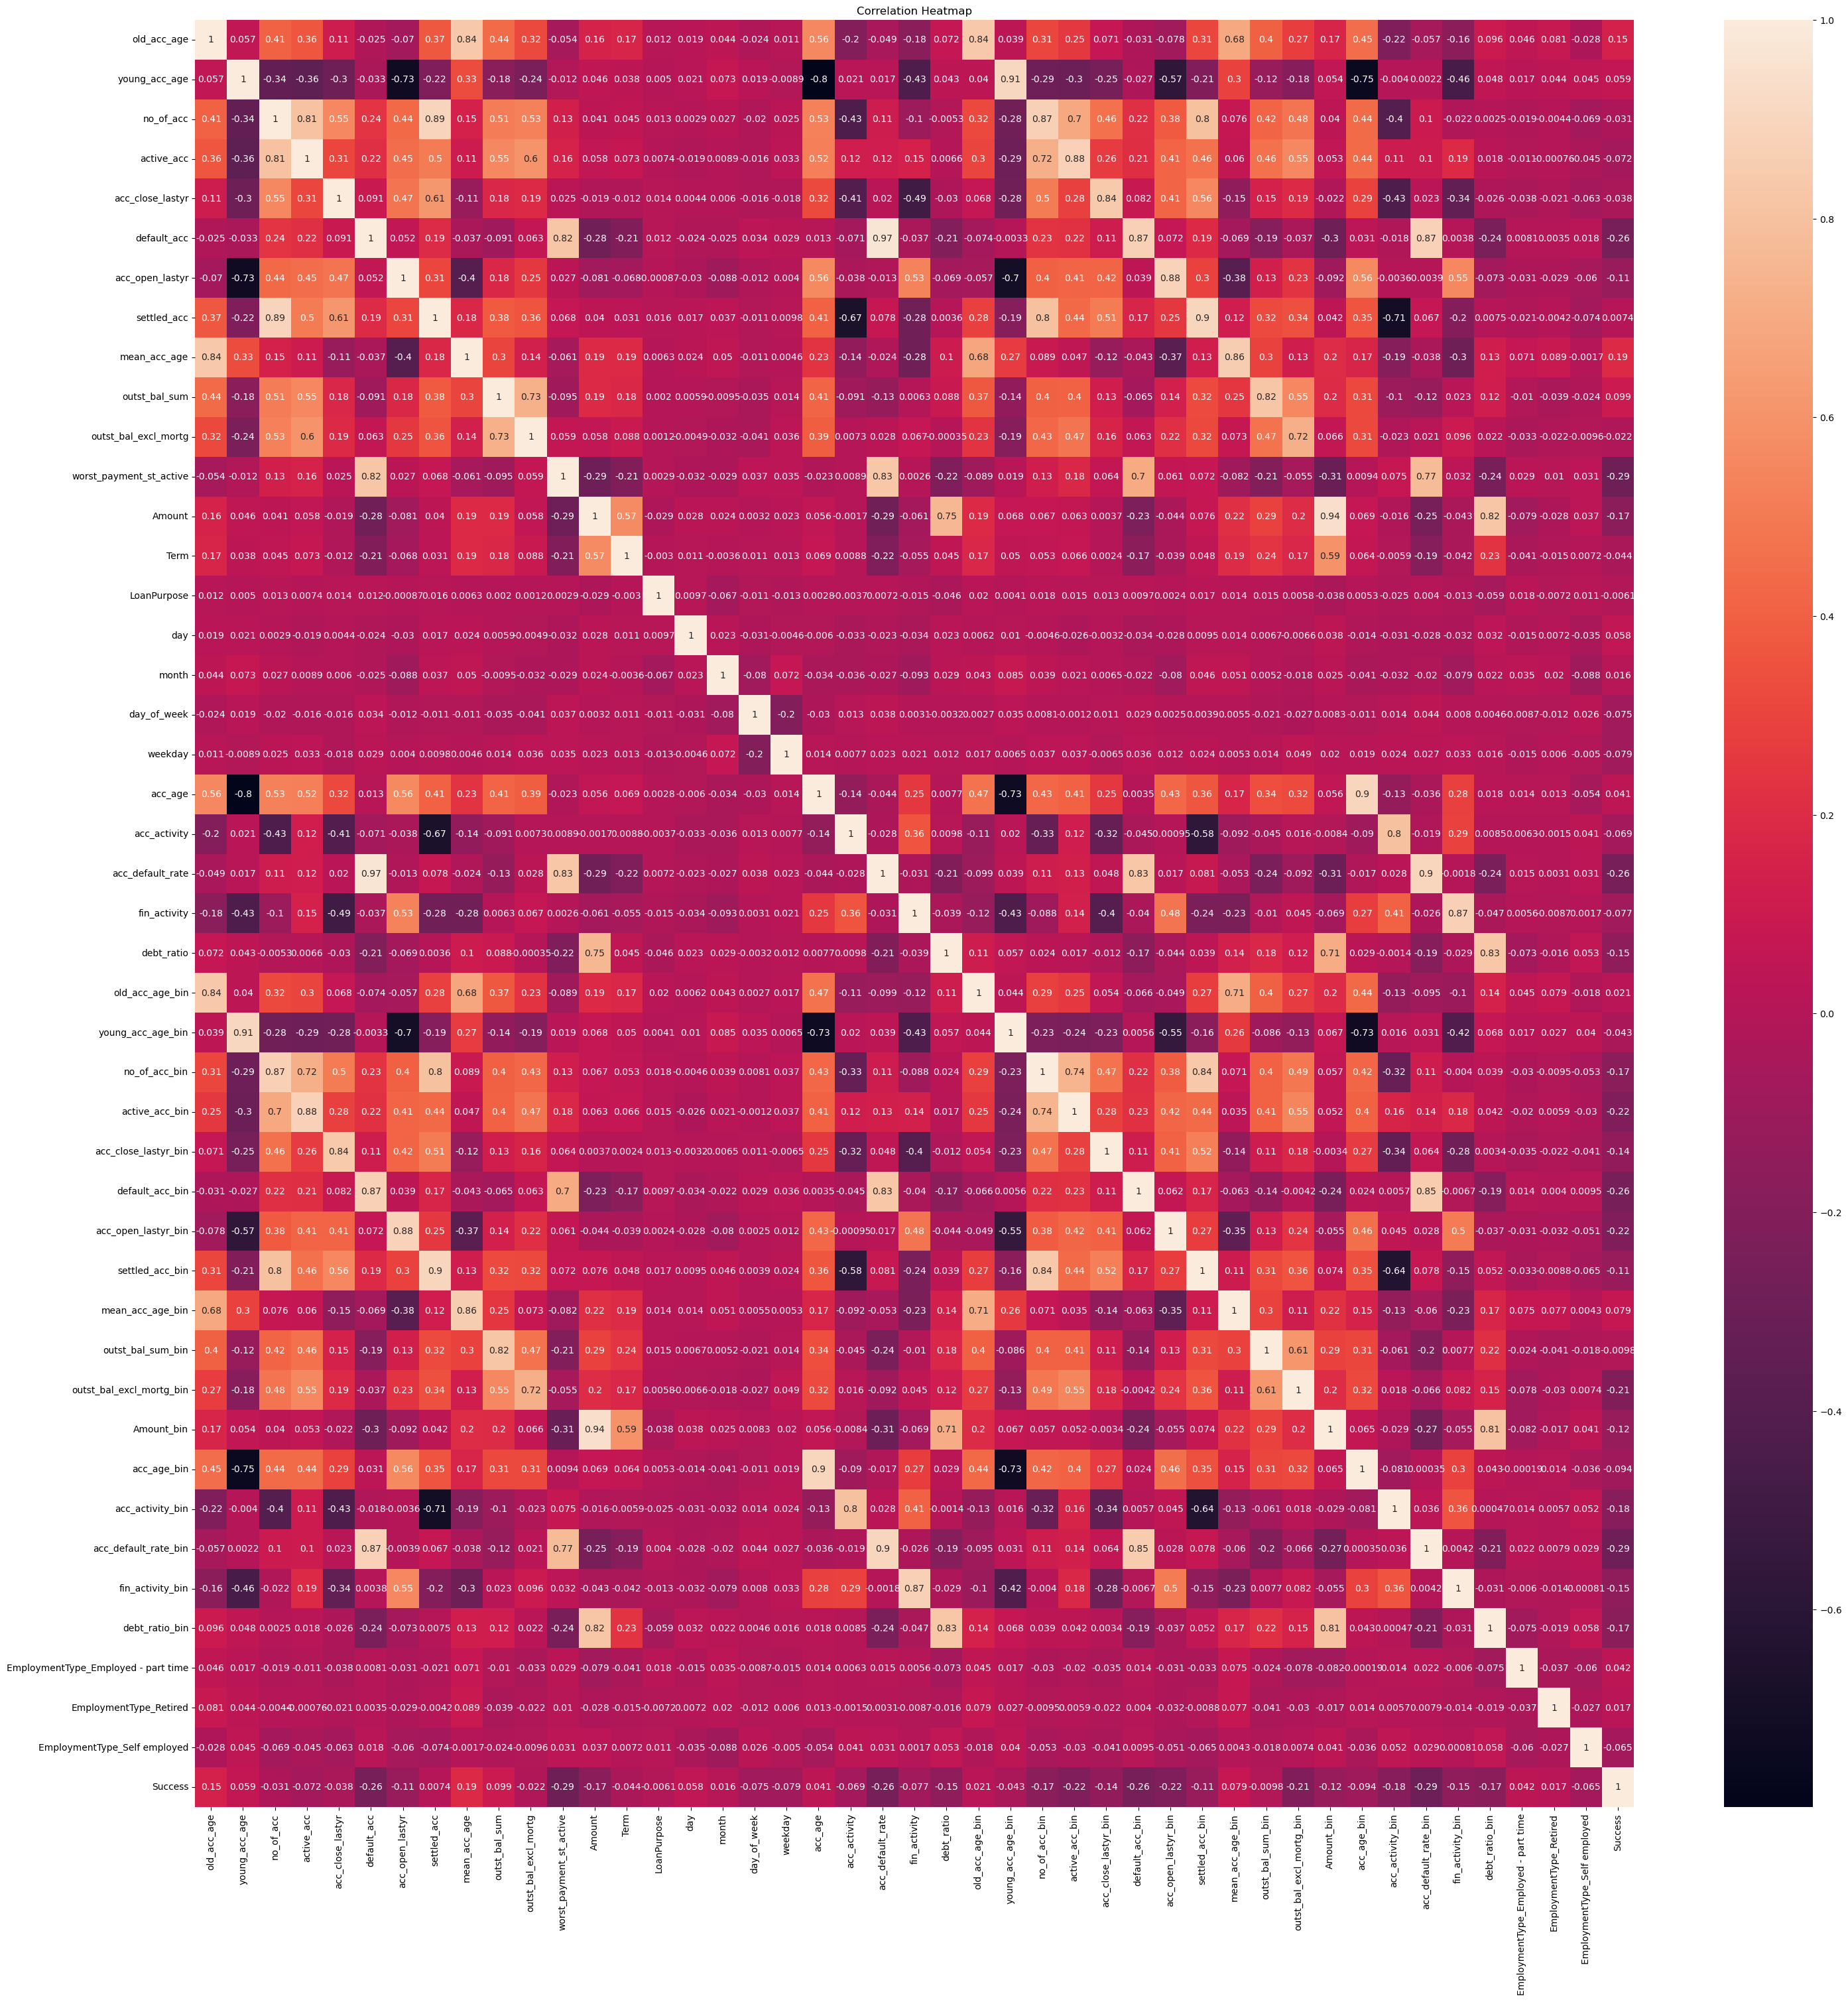

In [391]:
#Using Correlation matrix to identify collinearity

#Merfing the train and target sets to calculate the matrix
df_train_processed = pd.concat([x_train_scaled, y_train], axis=1)
cm = df_train_processed.corr() #Calculating the matrix

#Printing the correlated variables with the target variable in ascending order
print(cm.Success.sort_values().tail(5)) # Positively correlated
print(cm.Success.sort_values(ascending = False).tail(5)) #Negatively correlated

#Plotting the matrix
plt.figure(figsize=(35,35))
plt.title('Correlation Heatmap')
sns.heatmap(cm, xticklabels=df_train_processed.columns, yticklabels=df_train_processed.columns,annot=True)

From the above matrix, we can see that the engineered 'bins' column are naturally highly correlated with their parent numeric columns (which isn't surprising). It is also interesting to see that the target variable (Success of applications) is positively correlated with the mean age of accounts and also with the age of old accounts, and negatively correlated with rate of account defaults and the worst payment status flag for active accounts, which is expected.

### Feature Selection

In this section we use the feature importances and the correlation matrix to get rid of features which might not be adding any additional variance to the dataset. This is done to prevent overfitting in general and to create a more robust model.

Since the bins of all the numerical columns are highly correlated with their continuous counterpart (as seen from the correlation matrix) and the binned columns have a higher importance value, it is decided to drop the continuous counterparts and just keep the binned columns.

In [213]:
#Defining the columns to be dropped
cols_remove = ['old_acc_age',
 'young_acc_age',
 'no_of_acc',
 'active_acc',
 'acc_close_lastyr',
 'default_acc',
 'acc_open_lastyr',
 'settled_acc',
 'mean_acc_age',
 'outst_bal_sum',
 'outst_bal_excl_mortg',
 'Amount',
 'acc_age',
 'acc_activity',
 'acc_default_rate',
 'fin_activity',
 'debt_ratio']

#Creating a seperate dropped train and test set for evaluation
x_train_scaled_drop = x_train_scaled.drop(columns = cols_remove)
x_test_scaled_drop = x_test_scaled.drop(columns = cols_remove)

In [392]:
#Displaying the engineered train set
x_train_scaled_drop.head(5)

,worst_payment_st_active,Term,LoanPurpose,day,month,day_of_week,weekday,old_acc_age_bin,young_acc_age_bin,no_of_acc_bin,...,outst_bal_excl_mortg_bin,Amount_bin,acc_age_bin,acc_activity_bin,acc_default_rate_bin,fin_activity_bin,debt_ratio_bin,EmploymentType_Employed - part time,EmploymentType_Retired,EmploymentType_Self employed
0,0.000000,0.4,-0.238952,0.333333,0.166667,-1.000000,-0.50,1.0,0.0,1.0,...,1.0,0.5,0.5,-0.5,0.0,1.0,0.5,0.0,0.0,0.0
1,2.333333,-1.2,0.662669,-0.666667,-0.500000,0.000000,0.25,0.0,-0.5,1.0,...,1.0,-0.5,1.0,0.0,0.0,0.5,-0.5,0.0,0.0,0.0
2,0.000000,0.4,-0.341994,0.600000,0.333333,-1.000000,-0.50,-1.0,1.0,-0.5,...,0.5,1.0,-0.5,1.0,0.0,-0.5,0.5,0.0,0.0,0.0
3,0.000000,-0.8,-0.386409,-0.666667,0.000000,0.333333,-0.75,0.0,0.0,0.0,...,0.5,0.0,0.0,0.5,0.0,-0.5,0.5,0.0,0.0,0.0
4,0.000000,0.4,0.405063,-0.533333,0.166667,-0.666667,0.50,0.0,0.0,0.0,...,1.0,0.5,0.5,1.0,0.0,0.5,0.5,0.0,0.0,0.0


### Using PCA for feature selection

As a part of the feature selection process, we also engineer another train and test set by apply Principal Component Analysis. This uses mathematical project to reduce the number of features while maintaing most of the variance. For our case we use a 95% conservation of variance and reduce the number of features from 44 to only 18 for both the train and test sets.

This method will allow us to reduce dimensionality while preserving most of the variance and hence improve the bias-variance tradeoff, by mitigating multicolliearity.

Training components: 18
Test components: 18


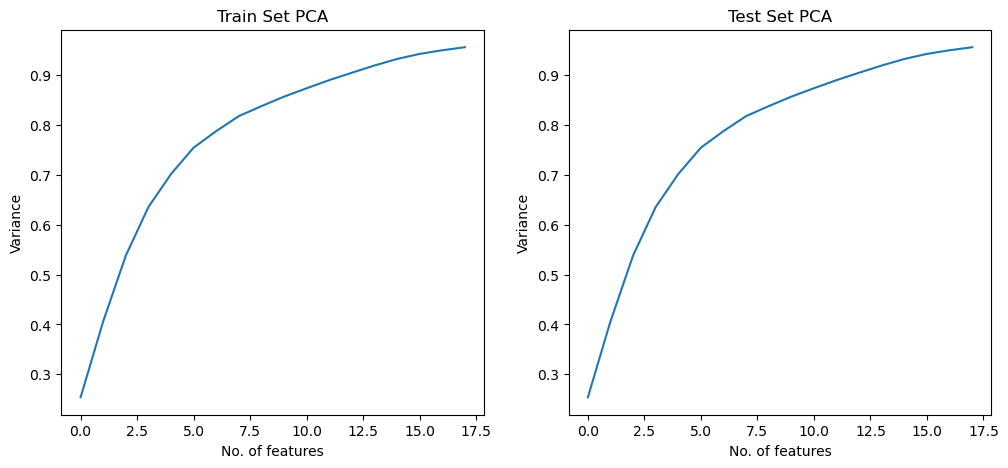

In [214]:
#Importing the PCA class 
from sklearn.decomposition import PCA

#Initialising 95% variance
pca = PCA(0.95)

#Fitting to train and test datasets
pca_train = pca.fit(x_train_scaled, y_train)
pca_test  = pca.fit(x_test_scaled, y_test)

#Printing the principal components
print(f'Training components: {pca_train.n_components_}')
print(f'Test components: {pca_test.n_components_}')

#-----------------------------------------


#Applying PCA on train set
x_train_scaled_pca = pd.DataFrame(pca_train.transform(x_train_scaled))

#Applying PCA on test set
x_test_scaled_pca = pd.DataFrame(pca_test.transform(x_test_scaled))


#Plotting the PCA curves showing variance vs components 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
plt.title('Train Set PCA')
plt.xlabel('No. of features')
plt.ylabel('Variance')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.title('Test Set PCA')
plt.xlabel('No. of features')
plt.ylabel('Variance')
plt.show()

From the above we can see that both the train and test sets have principal components equal to that 18. This means that 95% of the information stored in the dataset can be extracted from these 18 columns, hence making training on these datasets faster and more generalisable.

# Classification and Evaluation

The final part involves applying different classification algorithms on our transformed dataset/s as well as producing the best-performing model using Hyperparameter Tuning, while evaluating the performance evaluation metrics.

### Choice of Algorithms and why they are being used:
- **Logistic Regression**: For creating the baseline model for performance benchmarking
- **Support Vector Classifier (SVC)**: Can handle complex relationships in the data and is effective when there might be non-linear decision boundaries.
- **Decision Tree**: Simple to understand and interpret, suitable for capturing rule-based decisions.
- **Random Forest**: Ensemble of decision trees, reduces variance and overfitting.
- **AdaBoost**: Ensemble of weak learners, optimised for performance and robustness.
- **XGBoost**: Optimised version of gradient boosting with regularisation for robustness.
- **LGBM**: Similar to XGBoost but optimised for efficiency and speed, so would be interesting to consider.

### Choice of metrics:
- **Recall**: As the majority class are that of unsuccessful applications, a higher recall would indicate a more accuracy in majority class classification, which is important in our case as we aim to reduce false positives (Falsely succesful) which might prove to be costly to business.
- **Precision**: A higher precision would mean a higher proportion of the predicted minority class (succesful applications) being predicted correctly.
- **F1 Score**: A very important metric. Being the harmonic mean of Precision and Recall, it summarises the overall performance of the classifier for imbalalnced datasets.
- **AUC-PR**: Area under Precision-Recall Curve; a higher value implies that the classifier is effective at identifying true positive instances (successful loan applications) while minimizing false positives (incorrectly predicted successful applications), especially for imbalanced datasets.
- **AUC-ROC**: Similar to AUC-PR, but is better suited for balanced datsets. However we shall be using this to complement the AUC-PR score as a check.

### Importing all the required classifiers and evaluation metrics

In [291]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import StackingClassifier
from sklearn.svm          import SVC
import xgboost
from xgboost              import XGBClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from lightgbm             import plot_importance,LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve,auc, precision_score, recall_score, balanced_accuracy_score,accuracy_score, f1_score

## Logistic Regression

### Fine tuning Logistic Regression Model 

To start off with a performance benchmark, the Logistic Regression model is fit to all the three engineered training sets, and hyperparameter tuning is performed at three different threshold levels (to minimise false positive rates).

For the penalty term, the 'L2' regularisation term is being implemented instead of 'L1'. This is because L2 will assign near-zero weights to features that might not be important, unlike L1 which removes unimportant features completely.

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score, confusion_matrix, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np

# Define the thresholds
thresholds = [0.4, 0.5, 0.6]

# Define the train sets
train_sets = [x_train_scaled, x_train_scaled_pca, x_train_scaled_drop]
train_set_names = ['Original', 'PCA', 'Dropped']

# Initialize lists to store metrics for different thresholds and train sets
threshold_metrics_list = []

# Loop over the train sets
for train_set, train_set_name in zip(train_sets, train_set_names):
    # Loop over the threshold levels
    for threshold in thresholds:
        # Create a logistic regression model
        lr_model = LogisticRegression(max_iter=1000, random_state=1)

        # Define the number of folds for stratified K-fold cross-validation
        n_splits = 10

        # Define the hyperparameter grid for grid search
        param_grid_lr = {
            "penalty": ['l2'], 
            "C": [0.1, 1, 10, 100], 
            "solver": ['newton-cg', 'lbfgs', 'liblinear', 'saga']
        }

        # Initialize metric lists
        precision_scores = []
        recall_scores = []
        balanced_accuracy_scores = []
        confusion_matrices = []
        roc_auc_scores = []
        auc_pr_scores = []  
        f1_scores = []

        # Perform hyperparameter tuning using grid search and stratified K-fold cross-validation
        grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=n_splits, scoring='f1')
        grid_search_lr.fit(train_set, y_train)

        # Get the best hyperparameters from grid search
        best_params_lr = grid_search_lr.best_params_

        # Initialize the logistic regression model with the best hyperparameters
        best_model_lr = LogisticRegression(**best_params_lr, max_iter=1000)

        # Perform stratified K-fold cross-validation with the best model
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        
        #Perform cross validation
        for train_index, val_index in skf.split(train_set, y_train):
            x_train_fold, x_val_fold = train_set.iloc[train_index], train_set.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            # Defining class weights for training
            weights_lr = compute_sample_weight(class_weight='balanced', y=y_train_fold)

            # Fitting the model on the training fold
            best_model_lr.fit(x_train_fold, y_train_fold)

            # Predicting probabilities on the validation fold
            y_pred_probs = best_model_lr.predict_proba(x_val_fold)[:, 1]

            # Applying threshold
            y_pred = (y_pred_probs > threshold).astype(int)

            # Calculating evaluation metrics for the validation fold
            precision = precision_score(y_val_fold, y_pred)
            recall = recall_score(y_val_fold, y_pred)
            balanced_accuracy = balanced_accuracy_score(y_val_fold, y_pred)
            confusion = confusion_matrix(y_val_fold, y_pred)
            roc_auc = roc_auc_score(y_val_fold, y_pred_probs)

            # Calculating precision-recall curve
            precision_curve, recall_curve, _ = precision_recall_curve(y_val_fold, y_pred_probs)

            # Calculating precision-recall curve and AUC-PR
            auc_pr = auc(recall_curve, precision_curve)
            # Calculating the F1 Score
            f1 = f1_score(y_val_fold, y_pred)

            # Appending the metrics to the lists
            precision_scores.append(precision)
            recall_scores.append(recall)
            balanced_accuracy_scores.append(balanced_accuracy)
            confusion_matrices.append(confusion)
            roc_auc_scores.append(roc_auc)
            auc_pr_scores.append(auc_pr)
            f1_scores.append(f1)

        # Calculating the average metrics over all folds
        average_precision = np.mean(precision_scores)
        average_recall = np.mean(recall_scores)
        average_balanced_accuracy = np.mean(balanced_accuracy_scores)
        average_roc_auc = np.mean(roc_auc_scores)
        average_auc_pr = np.mean(auc_pr_scores)
        average_f1 = np.mean(f1_scores)

        # Creating a dictionary to store the metrics for this threshold and train set
        threshold_metrics_list.append({
            "Train Set": train_set_name,
            "Threshold": threshold,
            "Average Precision": average_precision,
            "Average Recall": average_recall,
            "Average Balanced Accuracy": average_balanced_accuracy,
            "Average ROC AUC": average_roc_auc,
            "Average AUC-PR": average_auc_pr,
            "Average F1 Score": average_f1
        })

# Printing the metrics for different threshold levels and train sets
for metrics in threshold_metrics_list:
    print(f'Train Set: {metrics["Train Set"]}, Threshold: {metrics["Threshold"]}')
    print(f"Average Precision: {metrics['Average Precision']:.2f}")
    print(f"Average Recall: {metrics['Average Recall']:.2f}")
    print(f"Average Balanced Accuracy: {metrics['Average Balanced Accuracy']:.2f}")
    print(f"Average ROC AUC: {metrics['Average ROC AUC']:.2f}")
    print(f"Average AUC-PR: {metrics['Average AUC-PR']:.2f}")
    print(f"Average F1 Score: {metrics['Average F1 Score']:.2f}")
    print('------------------------------------------------------------')


Train Set: Original, Threshold: 0.4
Average Precision: 0.77
Average Recall: 0.79
Average Balanced Accuracy: 0.85
Average ROC AUC: 0.93
Average AUC-PR: 0.87
Average F1 Score: 0.78
------------------------------------------------------------
Train Set: Original, Threshold: 0.5
Average Precision: 0.83
Average Recall: 0.73
Average Balanced Accuracy: 0.84
Average ROC AUC: 0.93
Average AUC-PR: 0.87
Average F1 Score: 0.78
------------------------------------------------------------
Train Set: Original, Threshold: 0.6
Average Precision: 0.88
Average Recall: 0.68
Average Balanced Accuracy: 0.82
Average ROC AUC: 0.93
Average AUC-PR: 0.87
Average F1 Score: 0.76
------------------------------------------------------------
Train Set: PCA, Threshold: 0.4
Average Precision: 0.69
Average Recall: 0.73
Average Balanced Accuracy: 0.80
Average ROC AUC: 0.89
Average AUC-PR: 0.78
Average F1 Score: 0.71
------------------------------------------------------------
Train Set: PCA, Threshold: 0.5
Average Precis

By running the fine tuned logistic regression model on the the three engineered train data sets (with all the features, with fetaures dropped and the PCA engineered set), the train set with all the features provided the highest Recall and F1 Score on average across all the validation folds. From the above we can see that the train set with all the preserved engineered features performed the best at the threshold level 0.4, but the difference between the train set with **all features and the PCA engineered train set is not significantly different**. 

From this, the baseline performance metrics on the train/validation dataset are as follows (Threshold at 0.4):
- **F1 Score**: 0.78
- **Recall**: 0.79
- **Precision**: 0.77
- **Balanced Accuracy**: 85%

## Model Comparison

Comparing the performance of all the other classification models on all the three engineered training sets and comparing their performances to select the train set along with the classifier which performs the best. Here we test the base performance of the classifiers against the tuned Logistic Regression model, so that we may choose the one which best suits the problem, for further hyperparamenter tuning.

In [243]:
# Defining the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(**best_params_lr, max_iter=1000), #tined logistic regression model
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=1),
    "XGBoost": XGBClassifier(n_estimators=200, random_state=1),
    "LGBM"   : LGBMClassifier(n_estimators=200, random_state=1)
}

# Defining the train sets 
x_train_reg  = x_train_scaled #regular
x_train_pca  = x_train_scaled_pca #pca engineered
x_train_drop = x_train_scaled_drop #features dropped
y_train      = y_train

#Creating a dictionary
train_sets_dict = {
    'All features': x_train_reg,
    'PCA': x_train_pca,
    'Dropped features': x_train_drop
}

# Defining the number of folds for K-Fold Stratified Cross Validation for more robust and less biased results
n_splits = 10

# Perform K-Fold Stratified Cross Validation for each classifier for maintaing the class balance ratio
for name, x_train in train_sets_dict.items():
    # Initialize a list to store the results
    results = []

    for clf_name, clf in classifiers.items():
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Initialize performance metrics lists
        precision_scores = []
        recall_scores = []
        balanced_accuracy_scores = []
        f1_scores = []
        roc_auc_scores = []
        auc_pr_scores = []

        for train_index, val_index in skf.split(x_train, y_train):
            x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
            #Defining class weights for training
            weights_arr = compute_sample_weight(class_weight='balanced', y=y_train_fold)
            
            # Fitting the classifier on the training fold
            clf.fit(x_train_fold, y_train_fold)

            # Predicting probabilities 
            y_pred_probs = clf.predict_proba(x_val_fold)[:, 1]
            
            # Predicting on the validation fold
            y_pred = clf.predict(x_val_fold)

            # Calculating evaluation metrics for the validation fold
            precision = precision_score(y_val_fold, y_pred)
            recall = recall_score(y_val_fold, y_pred)
            balanced_accuracy = balanced_accuracy_score(y_val_fold, y_pred)
            f1 = f1_score(y_val_fold, y_pred)
            roc_auc = roc_auc_score(y_val_fold, clf.predict_proba(x_val_fold)[:, 1])
            
            # Calculating precision-recall curve
            precision_curve, recall_curve, _ = precision_recall_curve(y_val_fold, y_pred_probs)

        
            # Calculating precision-recall curve and AUC-PR
            auc_pr = auc(recall_curve, precision_curve)


            # Appending the metrics to the lists
            precision_scores.append(precision)
            recall_scores.append(recall)
            balanced_accuracy_scores.append(balanced_accuracy)
            f1_scores.append(f1)
            roc_auc_scores.append(roc_auc)
            auc_pr_scores.append(auc_pr)

        # Calculating the average metrics over all folds
        average_precision = np.mean(precision_scores)
        average_recall = np.mean(recall_scores)
        average_balanced_accuracy = np.mean(balanced_accuracy_scores)
        average_f1 = np.mean(f1_scores)
        average_roc_auc = np.mean(roc_auc_scores)
        average_auc_pr = np.mean(auc_pr_scores)

        # Appending the results to the list
        results.append({
            "Classifier": clf_name,
            "Precision": average_precision,
            "Recall": average_recall,
            "Balanced Accuracy": average_balanced_accuracy,
            "F1 Score": average_f1,
            "AUC ROC Score": average_roc_auc,
            "AUC PR Score": average_auc_pr
        })

    # Converting the list of results to a DataFrame
    results_df = pd.DataFrame(results)
    
    results_df = results_df.rename_axis(name)

    # Printing the results
    display(results_df.sort_values(by='F1 Score', ascending=False))


,Classifier,Precision,Recall,Balanced Accuracy,F1 Score,AUC ROC Score,AUC PR Score
All features,,,,,,,
6,LGBM,0.911426,0.800084,0.884511,0.852077,0.964420,0.940149
5,XGBoost,0.903683,0.798506,0.882225,0.847655,0.962556,0.938165
3,Random Forest,0.917687,0.785901,0.878838,0.846541,0.965091,0.938409
4,AdaBoost,0.860847,0.798906,0.873515,0.828542,0.952523,0.922514
1,SVC,0.910663,0.754357,0.862357,0.825059,0.951467,0.919216
0,Logistic Regression,0.828816,0.733058,0.836018,0.777515,0.926436,0.874765
2,Decision Tree,0.734405,0.771683,0.830022,0.752341,0.830022,0.785653


,Classifier,Precision,Recall,Balanced Accuracy,F1 Score,AUC ROC Score,AUC PR Score
PCA,,,,,,,
5,XGBoost,0.852666,0.785891,0.865823,0.817763,0.949038,0.904580
6,LGBM,0.853689,0.770919,0.858969,0.809994,0.949735,0.903963
1,SVC,0.852537,0.742124,0.845281,0.793231,0.943181,0.891168
3,Random Forest,0.882638,0.692450,0.827775,0.775850,0.943055,0.890707
4,AdaBoost,0.780388,0.731880,0.824628,0.754993,0.915358,0.842753
0,Logistic Regression,0.750071,0.642361,0.778212,0.691830,0.888631,0.781514
2,Decision Tree,0.651857,0.682992,0.768488,0.666914,0.768488,0.712705


,Classifier,Precision,Recall,Balanced Accuracy,F1 Score,AUC ROC Score,AUC PR Score
Dropped features,,,,,,,
5,XGBoost,0.884568,0.798894,0.878633,0.839471,0.954873,0.926038
6,LGBM,0.894078,0.788651,0.875639,0.838037,0.955366,0.925561
3,Random Forest,0.892295,0.751604,0.857669,0.815813,0.951451,0.913579
4,AdaBoost,0.826306,0.757499,0.846819,0.790293,0.933671,0.889545
1,SVC,0.855768,0.729904,0.840354,0.787779,0.933301,0.885055
2,Decision Tree,0.692976,0.755107,0.810543,0.722522,0.810543,0.759016
0,Logistic Regression,0.736294,0.613969,0.762992,0.669504,0.876858,0.755773


### Modelling Decision:

For Classification, both the Light Gradient Boosting Machine (LGBM) and the Extreme Gradient Boosting algorith (XGBoost) perform fairly similarly with barely any substantial difference. For this reason I chose to go ahead with **Light Gradient Boosting Machine (LGBM) algorithm**, solely due to its faster computation speed and efficiency.

### Feature Engineering Decision:
From the performance results we can see that the validation performance of the LGBM model is very similar across all the the three engineered training sets (all features, dropped features and Pricipal components).

For this reason I chose to proceed with the PCA engineered training set with the least number of features (18), compared to 44 features of the total engineered set, and 27 features of the dropped feature set. The PCA engineered training set having the least number of features and similar performance to the best performing training set, it has the additional benefits of:
1. **Reduced Dimensionality**: Which can lead to faster training times and less chance of overfitting.
2. **Reduced Noise**: Captures the most important variance in the data, removing irrelevant features and resulting in a more focused and robust representation of the data.
3. **Reduced Multicollinearity**: By removing irrelevant features, it greatly reduces muticollinearity, making the model more interpretable and robust.


### Hyper Parameter Optimisation for the best performing model

Now having chosen the training set and the optimal classifier algorithm based on validation set performance, the hyperparameter optimisation is performed to find the best parameters for the model, resulting in the best validation set performance.

This will allow us to use the tuned classifier on the unseen test dataset, to get the optimal test set classification performance.


In [315]:
# Creating a logistic regression model
lgbm_model = LGBMClassifier(random_state=1)
classifier_name = "LGBM"  # Name of the classifier

# Defining the train and test sets
x_train = x_train_scaled_pca
y_train = y_train

# Defining the number of folds for stratified K-fold cross-validation
n_splits = 10

# Defining the hyperparameter grid for grid search
param_grid_lgbm = {
    'n_estimators': [ 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0.0, 0.1],
    'reg_lambda': [0.0, 0.1]
}


# Performing hyperparameter tuning using grid search and stratified K-fold cross-validation
grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid_lgbm, cv=n_splits, scoring='f1')
grid_search_lgbm.fit(x_train, y_train)

# best hyperparameters from grid search
best_params_lgbm = grid_search_lgbm.best_params_

# Initialize the logistic regression model with the best hyperparameters
best_model_lgbm = LGBMClassifier(**best_params_lgbm, random_state = 1)

# Performing stratified K-fold cross-validation with the best model
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#Initialise performance metrics
precision_scores = []
recall_scores = []
balanced_accuracy_scores = []
confusion_matrices = []
roc_auc_scores = []
f1_scores = []
auc_pr_scores = []

for train_index, val_index in skf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fitting the model on the training fold
    best_model_lgbm.fit(x_train_fold, y_train_fold)
    
    # Predicting probabilities on the validation fold
    y_pred_probs = best_model_lgbm.predict_proba(x_val_fold)[:, 1]

    # Predicting on the validation fold
    y_pred = best_model_lgbm.predict(x_val_fold)

    # Calculating precision-recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_val_fold, y_pred_probs)

        
    # Calculating precision-recall curve and AUC-PR
    auc_pr = auc(recall_curve, precision_curve)


    # Calculating evaluation metrics for the validation fold
    precision = precision_score(y_val_fold, y_pred)
    recall = recall_score(y_val_fold, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_val_fold, y_pred)
    confusion = confusion_matrix(y_val_fold, y_pred)
    roc_auc = roc_auc_score(y_val_fold, best_model_lgbm.predict_proba(x_val_fold)[:, 1])
    f1 = f1_score(y_val_fold, y_pred)
    

    # Appending the metrics to the lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    balanced_accuracy_scores.append(balanced_accuracy)
    confusion_matrices.append(confusion)
    roc_auc_scores.append(roc_auc)
    f1_scores.append(f1)
    auc_pr_scores.append(auc_pr)

# Calculating the average metrics over all folds
average_precision = np.mean(precision_scores)
average_recall    = np.mean(recall_scores)
average_balanced_accuracy = np.mean(balanced_accuracy_scores)
average_roc_auc = np.mean(roc_auc_scores)
average_f1 = np.mean(f1_scores)
average_auc_pr = np.mean(auc_pr_scores)


# Printing the metrics
print(f'Classifier: {classifier_name}')
print(f"Best Parameters: {best_params_lgbm}")
print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")
print(f"Average Balanced Accuracy: {average_balanced_accuracy:.2f}")
print(f"Average ROC AUC: {average_roc_auc:.2f}")
print(f"Average PR AUC: {average_auc_pr:.2f}")
print(f"Average F1 Score: {average_f1:.2f}")
print('------------------------------------------------------------')

Classifier: LGBM
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
Average Precision: 0.85
Average Recall: 0.78
Average Balanced Accuracy: 0.86
Average ROC AUC: 0.95
Average PR AUC: 0.90
Average F1 Score: 0.81
------------------------------------------------------------


On the K-fold Stratified validation sets, the parameter tuned LGBM Classifier model achieved the folowing perfromance mtrics:

- Average Precision: **0.85**
- Average Recall: **0.78**
- Average Balanced Accuracy: **86%**
- Average ROC AUC: **0.95**
- Average PR AUC: **0.90**
- Average F1 Score: **0.81**


### Testing out the Final Tuned model on the Test Set

Using the optimised final model with the fine tuned hyperparameters,  we conduct the final performance evaluation to check the final performance of the model on the unseen test dataset.


Test Precision: 0.29
Test Recall: 0.68
Test Accuracy: 0.79
Test ROC AUC: 0.83
Test PR AUC: 0.33
Test F1 Score: 0.41
------------------------------------------------------------


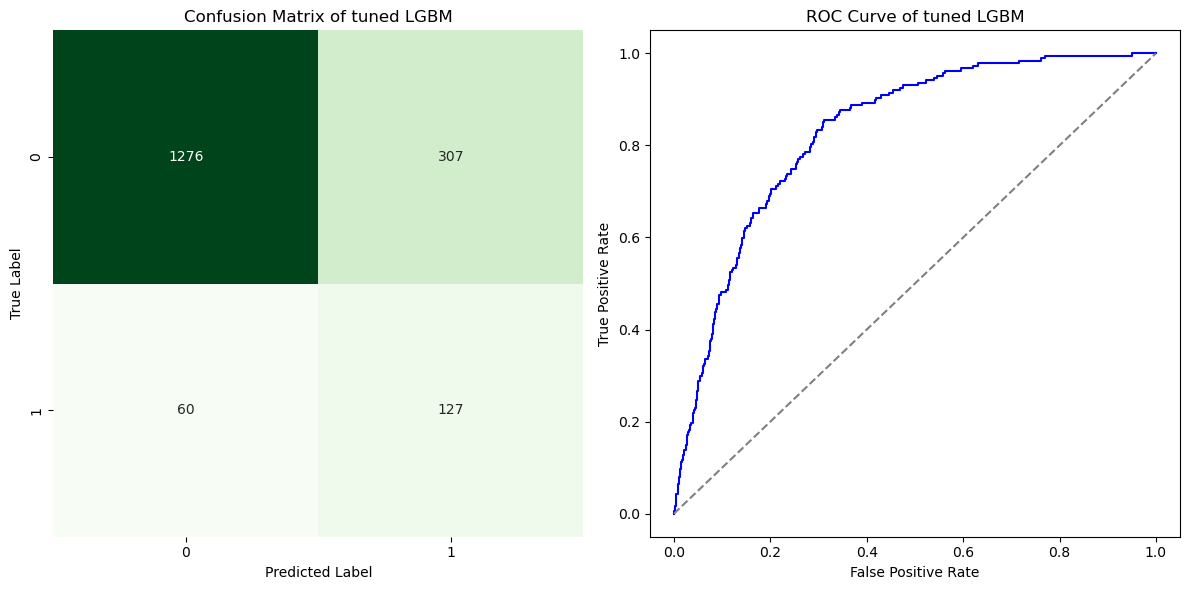

In [314]:
# Defining the train and test sets
x_train = x_train_scaled_pca
y_train = y_train
x_test = x_test_scaled_pca
y_test = y_test

#Initialising performance metrics
precision_scores = []
recall_scores = []
balanced_accuracy_scores = []
confusion_matrices = []
roc_auc_scores = []
f1_scores = []
auc_pr_scores = []

#**best_params_lgbm,

# Defining the model
final_lgbm = LGBMClassifier(random_state = 1)

#Fitting the model on the entire train set
final_lgbm.fit(x_train, y_train)
y_pred = final_lgbm.predict(x_test)
# Predicting probabilities on the validation fold
y_pred_probs = final_lgbm.predict_proba(x_test)[:, 1]

#Calculating performance metrics

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, final_lgbm.predict_proba(x_test)[:, 1])
f1 = f1_score(y_test, y_pred)
# Calculating precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)
# Calculating precision-recall curve and AUC-PR
auc_pr = auc(recall_curve, precision_curve)

# Print the metrics
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test ROC AUC: {roc_auc:.2f}")
print(f"Test PR AUC: {auc_pr:.2f}")
print(f"Test F1 Score: {f1:.2f}")
print('------------------------------------------------------------')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Greens", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of tuned LGBM')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, final_lgbm.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of tuned LGBM')

plt.tight_layout()
plt.show()

### Final Test Set Performance Metrics:
- The fine-tuned LGBM model achieved an overall test accuracy of **79%**
- It also achieved an overall F1 Score of **0.41** 
- An AUC-ROC score of **0.82**.
- An AUC-PR score of **0.33**.
- It achieved a high Recall Score of **0.68**.


# Deep Neural Network Implementation

As an alternative to traditional ensemble approaches, I also implemented a fully connected neural network layer. The rational behind employing this method was to check whether training a neural network on the train data set would allow us to capture any missed non linear relationships and hidden patterns in the dataset, which may be leveraged by the network to make more robust and accurate predictions.

For this Implementation, Google's deep leaarning library, Tensorflow, was leveraged where we use Keras to create the architecture of the deep learning framework.

### Importing all the required libraries 

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

### Calculating the class weights

As we have performed synthetic oversampling of the train set, the % of minority class was increased from 10% to almost 30%. However to counter the slight remaining imbalance of target classes we employ class weighting, a technique used to give more importance to the minority class during training to help the model better handle imbalanced datasets.

In [207]:
from sklearn.utils import class_weight

# Class weights
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
weights_dict={} #initialising empty weight dictionary

#Populating the weights dictionary with the proportions of the binary classes
for index, weight in enumerate(class_weights):
    weights[index] = weight

1. For implementing the Neural Network, we first define the class weights (as shown above) to allow the nural network to assign the apppropriate weighting to the binary classes during the training phase.

2. We define a learning rate schedule function, which is called during the traing cycle of the neural network. The learning rate schedule makes sure that the learning rate is reduced decrementally, after a certain number of epochs are completed. This is mainly done to avoid local minimas and better convergence.

3. We define a neural network using keras's Sequential method with dropout layers, to ensure better generalisation and less bias.

4. We also employ early stopping to stop the training in the case of a validation loss runaway. This is done so that the model stops training once it starts to overfit.

In [319]:
# Define a learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 10:      #Setting 10 epochs as the limit after which learning rate will slow down
        return initial_lr
    else:
        return initial_lr * tf.math.exp(0.1 * (10 - epoch))


# Building the Neural Network Model
model_nn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(18,)), #adding a layer
    layers.Dropout(0.5), #Dropout Layer
    layers.Dense(32, activation='relu'), #adding a layer
    layers.Dropout(0.5), #Dropout Layer
    layers.Dense(1, activation='sigmoid') #Sigmoid function to give the binary output
])

# Compiling the Model
model_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Defining Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the Model with Learning Rate Schedule and Early Stopping
history = model_nn.fit(x_train_scaled_pca, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2,
                    class_weight=weights,
                    callbacks=[LearningRateScheduler(lr_schedule), early_stopping])



Epoch 1/100


2023-08-09 09:27:37.200377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-09 09:27:38.836263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 - 2s - loss: 0.6591 - accuracy: 0.6415 - val_loss: 0.9127 - val_accuracy: 0.2945 - lr: 0.0010 - 2s/epoch - 19ms/step
Epoch 2/100
111/111 - 1s - loss: 0.4833 - accuracy: 0.7640 - val_loss: 1.0138 - val_accuracy: 0.2202 - lr: 0.0010 - 857ms/epoch - 8ms/step
Epoch 3/100
111/111 - 1s - loss: 0.4466 - accuracy: 0.8065 - val_loss: 1.0203 - val_accuracy: 0.2421 - lr: 0.0010 - 813ms/epoch - 7ms/step
Epoch 4/100
111/111 - 1s - loss: 0.4164 - accuracy: 0.8236 - val_loss: 0.9992 - val_accuracy: 0.2568 - lr: 0.0010 - 813ms/epoch - 7ms/step
Epoch 5/100
111/111 - 1s - loss: 0.4044 - accuracy: 0.8326 - val_loss: 0.9522 - val_accuracy: 0.3187 - lr: 0.0010 - 776ms/epoch - 7ms/step
Epoch 6/100
111/111 - 1s - loss: 0.3971 - accuracy: 0.8374 - val_loss: 0.9397 - val_accuracy: 0.3283 - lr: 0.0010 - 756ms/epoch - 7ms/step
Epoch 7/100
111/111 - 1s - loss: 0.3910 - accuracy: 0.8406 - val_loss: 0.9403 - val_accuracy: 0.3215 - lr: 0.0010 - 768ms/epoch - 7ms/step
Epoch 8/100
111/111 - 1s - loss: 0.3794 -

Performing the final evaluation of the Neural Network on the Test Set to see how it performs on unseen data.

In [320]:
# Evaluating the NN Model on the Test Set
loss, accuracy = model_nn.evaluate(x_test_scaled_pca, y_test) #Calculating the loss and accuracy on the test set
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

56/56 [==============================] - 0s 6ms/step - loss: 0.3464 - accuracy: 0.8650
Test Loss: 0.3464
Test Accuracy: 0.8650


From the results above we can see that the Neural Network achieves a classification accuracy of over 80%.

We now print the classification eport for the neural network against the test set to evaluate the overall performance of the model.

In [322]:
# Make Predictions
y_pred_probs_nn = model_nn.predict(x_test_scaled_pca)
y_pred_nn = (y_pred_probs_nn > 0.4).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))


56/56 [==============================] - 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1583
           1       0.29      0.55      0.38       187

    accuracy                           0.81      1770
   macro avg       0.61      0.69      0.63      1770
weighted avg       0.87      0.81      0.83      1770



2023-08-09 09:28:37.709448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


From the above classification report we can see that the model was able to achieve a high F1 - Score (both Precision and Recall) for the majority negative class, which is a desirable result. This is because it means that the model greatly reduces the risk of misclassification of potential loan defaulters, which helps to greatly reduce the overall risk to the firm.

In [323]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve,auc, precision_score, recall_score, balanced_accuracy_score, f1_score

# Calculating the metrics
precision_nn = precision_score(y_test,y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_probs_nn)
f1_nn = f1_score(y_test, y_pred_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
# Calculating precision-recall curve
precision_curve_nn, recall_curve_nn, _ = precision_recall_curve(y_test, y_pred_probs_nn)
# Calculating precision-recall curve and AUC-PR
auc_pr_nn = auc(recall_curve_nn, precision_curve_nn)


# Print the metrics
print(f"Test Precision: {precision_nn:.2f}")
print(f"Test Recall: {recall_nn:.2f}")
print(f"Test Accuracy: {accuracy_nn:.2f}")
print(f"Test ROC AUC: {roc_auc_nn:.2f}")
print(f"Test PR AUC: {auc_pr_nn:.2f}")
print(f"Test F1 Score: {f1_nn:.2f}")
print('------------------------------------------------------------')


Test Precision: 0.29
Test Recall: 0.55
Test Accuracy: 0.81
Test ROC AUC: 0.81
Test PR AUC: 0.32
Test F1 Score: 0.38
------------------------------------------------------------


### Final Test Set Performance Metrics:

From the above performance metrics we can see that the Neural Network's performance on the final unseen test set is similar to that of the tuned LGBM Classifier model if not worse. The performance metrics observed are as follows:
- **Precision**: 0.29
- **Recall**: 0.52
- **Accuracy**:81%
- **Auc-pr**: 0.32
- **Auc-roc**: 0.81
- **F1 Score**: 0.38

From the visualisation of the Confusion matix below, it can be seen that the Neural Network does a good job at classifying the negative (unsuccesful applications) with high recall, but it terribly under performs when it comes to classifying positive (succesful outcomes). 

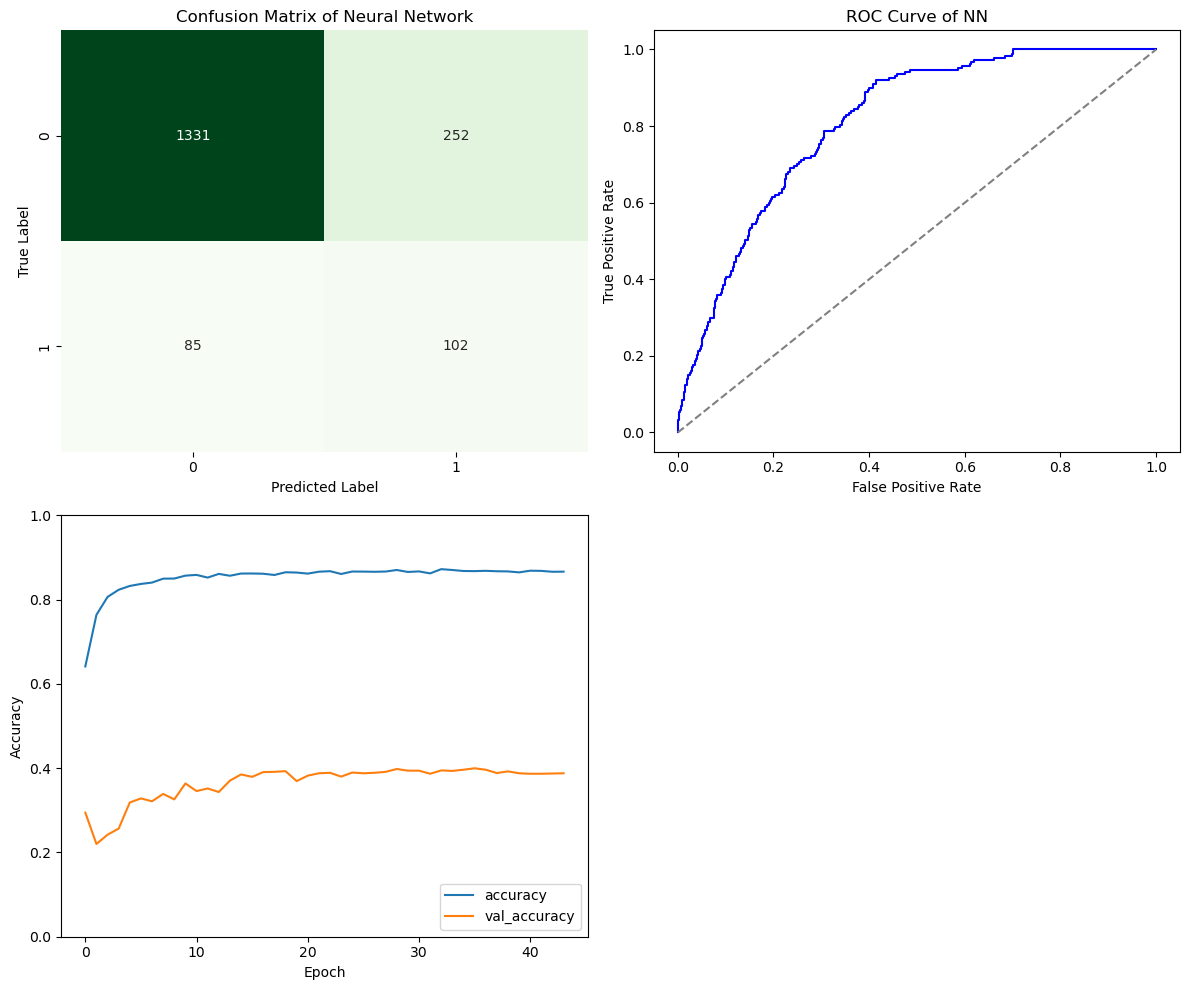

In [324]:
# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(cm_nn, annot=True, fmt=".0f", cmap="Greens", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Neural Network')

# ROC Curve
plt.subplot(2, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_nn)
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of NN')

# Visualize Training History
plt.subplot(2, 2, 3)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


plt.tight_layout()
plt.show()


# Summary

In summary, the aim was to create a loan application risk classification model with the objective of minimising the risk factor as much as possible.

The final model which performed the best on the test set , with the given conditions of having a high majority and minority class recall and interpretability, is the fine-tuned **Light Gradient Boosting Machine**, achieving a final test accuracy score of **79%**. The PCA engineered training set was also chosen as the final train set die to it's reduced dimensionality and higher robustness compared to the other train sets.

From the confusion matrices of the two models, it can be seen that the **Light GBM** model does a better job at classifying both the negative and the positive outcomes as compared to the Neural Network, with a slightly better F1 Score and AUC-PR score.


#### Steps Taken to Solve the Problem:

1. Data Preprocessing:
   - Imported necessary libraries: The required libraries such as pandas, numpy, seaborn, and others were imported for data manipulation and visualization.
   - Loaded datasets: Two datasets were loaded from specified file paths using `pd.read_csv()`.
   - Joined datasets: The credit scores and loan application datasets were merged using an inner join on a common UID.
   - Checked for missing values: The code checked for missing values in the merged dataset using `.isna().sum()`.

2. Data Cleaning and Transformation:
   - Unnecessary columns removal: Columns like 'UID' and 'ALL_TimeSinceMostRecentDefault' were dropped from the dataset.
   - Renaming columns: Column names were renamed for better readability.
   - Imputing missing values: Records with 0 accounts were considered as invalid and were imputed with appropriate mean values. Columns with -1 values were also imputed with the mean.
   - Feature creation: New features like account age, account activity, account default rate, and financial activity were created based on existing columns. Continuous numeric features were also dicretised and labelled as bins, to add complexity and interpretability to the dataset, resulting in an overall 44 feature dataset.
   - Date processing: Calendar information such as day, day of the week, month, and weekday were extracted from the 'ApplicationDate' column to add seasonality.
   - Outlier handling: Outliers in selected numeric columns were transformed using the log transformation.

3. Feature Encoding:
   - Label Encoding: Categorical variables with a low number of categories (less than 5) were label-encoded along with the discretised numerical bin columns.
   - One-Hot Encoding: The 'EmploymentType' column was one-hot encoded since it had a small number of categories.

4. Data Scaling:
   - Robust Scaling: The data was robust-scaled using `RobustScaler()` to handle the presence of outliers.

5. Feature Importance Analysis:
   - Extra Trees Classifier: Feature importance was analyzed using `ExtraTreesClassifier()`, and the top features were plotted. This was done mainly to perform feature engineering bu dropping the irrelevant features.

6. Principal Component Analysis (PCA):
   - PCA Application: As a part of Feature Engineering, PCA was applied to reduce the dimensionality of the dataset, and capture 95% of the variance.

7. Model Building and Evaluation:
   - Logistic Regression: A logistic regression model was built using hyperparameter tuning via grid search and evaluated using cross-validation to provide a baseline performance metric to compare against.
   - Ensemble Models: Various ensemble models including Random Forest, AdaBoost, Gradient Boosting, XGBoost, and LightGBM were evaluated using K-Fold Stratified Cross Validation, and compared agianst the base model as well.
   
8. Feature Enginering Selection:
    - Drop Features: A seperate training set was engineered by dropping highly correlated features manually, based on the feature importances and the correlational heat map.
    - PCA: Principal Component Analysis was applied to create another training set, preserving 95% of the variance and reducing the dimensionality to 18 from 44.
    - Adding aditional features: As the initial part of feature engineering, many additional columns were engineered based on existing ones taking the final feature count to 44.

9. Final Model Selection:
   - LightGBM Model: A LightGBM classifier with the best hyperparameters from grid search was selected as the final model.
   - Model Evaluation: The final model's performance was evaluated on the test set, and metrics like precision, recall, balanced accuracy, ROC AUC, and F1 score were calculated.
   - Confusion Matrix and ROC Curve: The confusion matrix and ROC curve were plotted to visualize the model's performance on the unseen test set.
   
10. Neural Network Implementation:
    - A Neural Network was also implemented using Tensorflow's Keras library to check whether there was any performance to be gained.
    - The Neural Network was trained and tuned against the validation datasets, and its final configuration was tested against the unseen test set. 
    
 The performance of the Neural Network was not too different than that of the fine tuned LGBM Model, and hence the **fine tuned LGBM Model** was chosen to be the final model due to its better performance in discriminating the binary classes (as seen from the confusion matrices), better interpretability, quick computation speed, and generalisable performance on unseen data.


### Thank You!